# Image Classifier Algorithm


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

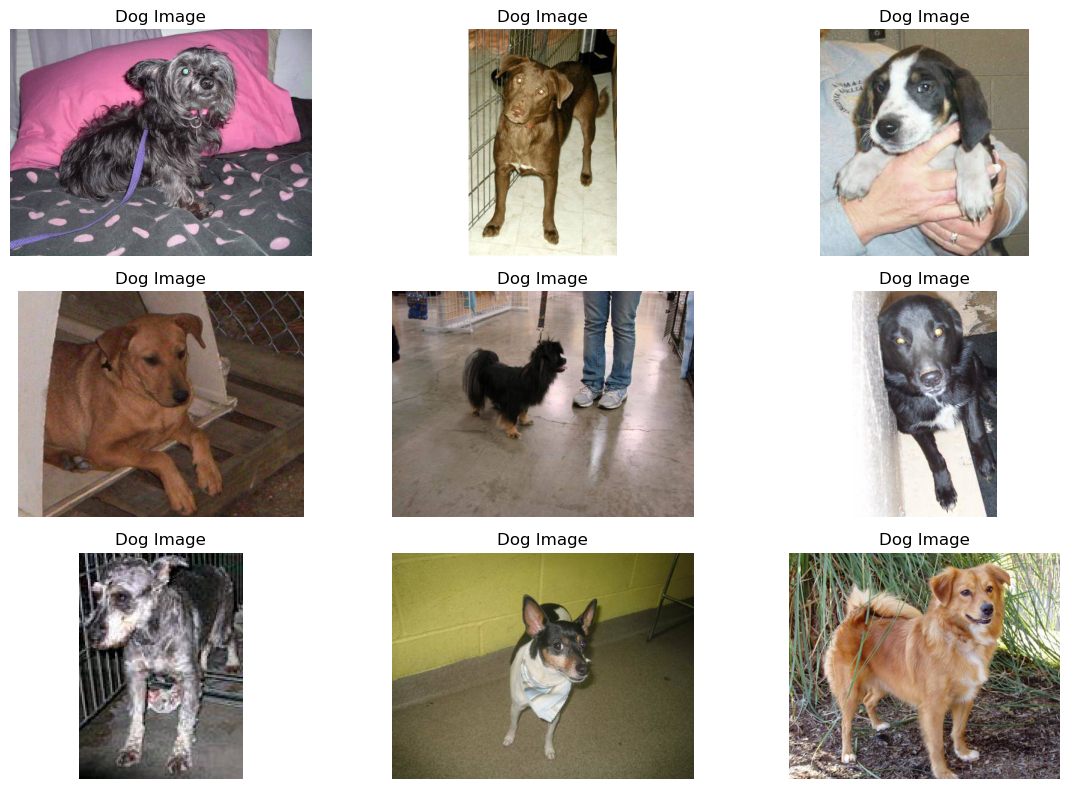

In [2]:
data_path = "C:\Data Science\Israel-Project-ImageClassifier\Israel\data"
dog_folder = os.path.join(data_path, "dog")
dog_image_files = os.listdir(dog_folder)

dog_images = []

for i in range(9):
    image_path = os.path.join(dog_folder, dog_image_files[i])
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')



plt.tight_layout()


plt.show()

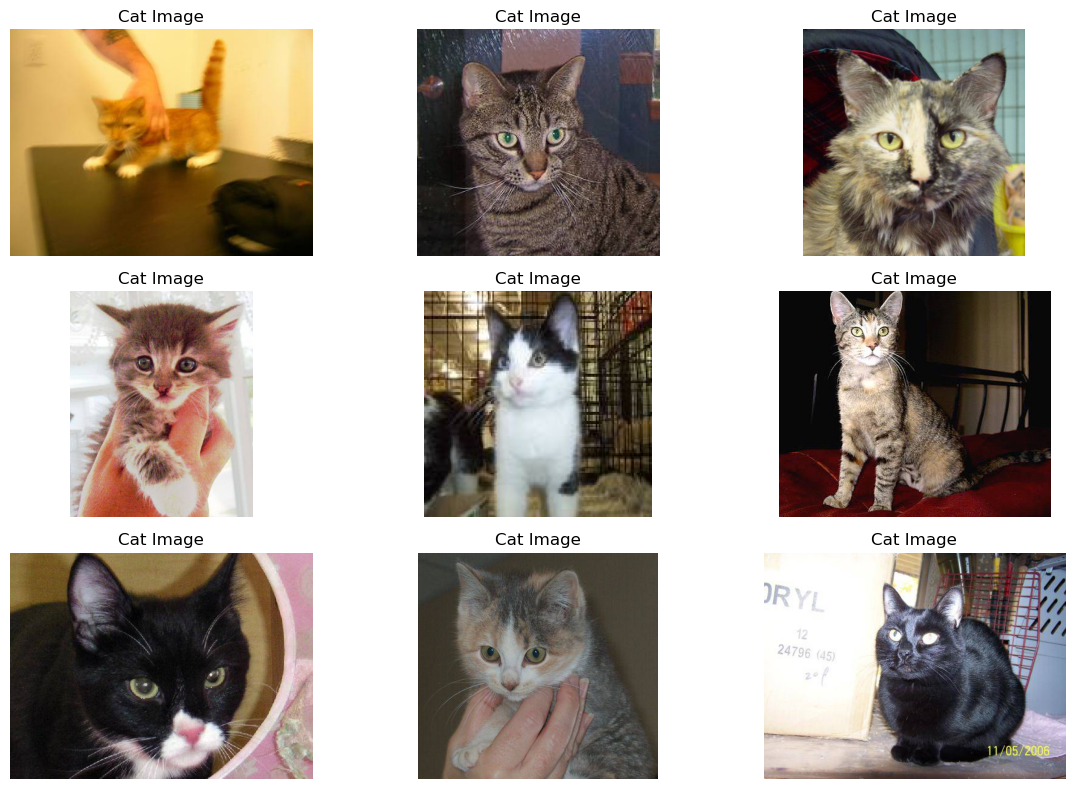

In [3]:
data_path = "C:\Data Science\Israel-Project-ImageClassifier\Israel\data"
cat_folder = os.path.join(data_path, "cat")
cat_image_files = os.listdir(cat_folder)

cat_images = []

for i in range(9):
    image_path = os.path.join(cat_folder, cat_image_files[i])
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')



plt.tight_layout()


plt.show()

In [4]:
train_dir = "../Israel/data/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()


train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(GlobalAveragePooling2D())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [6]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


In [7]:
model.fit(train_data, epochs = 1)



782/782 [==============================] - 4974s 6s/step - loss: 0.8376 - accuracy: 0.4959


In [8]:
checkpoint = ModelCheckpoint("../Israel/models/IC_model", monitor = "accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 1, callbacks = [checkpoint, early])


100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5028
Epoch 1: accuracy improved from -inf to 0.50281, saving model to ../Israel/models\IC_model
INFO:tensorflow:Assets written to: ../Israel/models\IC_model\assets


INFO:tensorflow:Assets written to: ../Israel/models\IC_model\assets


100/100 [==============================] - 945s 9s/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4906


In [1]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

NameError: name 'plt' is not defined